In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [2]:
data = pd.read_csv(r'C:\Users\SATHVIK\OneDrive\Desktop\smartinternz\Thyroid Classification\5. project Executable Files\Data\thyroidDF.csv')
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027


In [3]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [4]:
data.isnull()


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,True,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9168,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9169,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9170,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [5]:
data.isnull().sum()


age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

In [6]:

# Drop redundant attributes and modify the original dataframe
data.drop(['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'referral_source', 'patient_id'], axis=1, inplace=True)


In [7]:
# Remapping target values to diagnostic group
diagnoses = {
    'A': 'hyperthyroid conditions', 'B': 'hyperthyroid conditions',
    'C': 'hyperthyroid conditions', 'D': 'hyperthyroid conditions',
    'E': 'hypothyroid conditions', 'F': 'hypothyroid conditions',
    'G': 'hypothyroid conditions', 'H': 'hypothyroid conditions',
    'I': 'binding protein', 'J': 'binding protein',
    'K': 'general health', 'L': 'replacement therapy',
    'M': 'replacement therapy', 'N': 'replacement therapy',
    'O': 'antithyroid treatment', 'P': 'antithyroid treatment',
    'Q': 'antithyroid treatment', 'R': 'miscellaneous',
    'S': 'miscellaneous', 'T': 'miscellaneous'
}

In [8]:
data['target'] = data['target'].map(diagnoses)
data.dropna(subset=['target'], inplace=True)
print(data['target'].value_counts())


target
hypothyroid conditions     593
general health             436
binding protein            376
replacement therapy        336
miscellaneous              281
hyperthyroid conditions    182
antithyroid treatment       33
Name: count, dtype: int64


In [9]:
data['target'].value_counts()


target
hypothyroid conditions     593
general health             436
binding protein            376
replacement therapy        336
miscellaneous              281
hyperthyroid conditions    182
antithyroid treatment       33
Name: count, dtype: int64

In [10]:
data.describe()


,age,TSH,T3,TT4,T4U,FTI,TBG
count,2237.000000,2087.000000,1643.000000,2140.000000,2059.000000,2060.000000,98.000000
mean,52.792579,14.930791,1.961875,116.390495,1.013439,120.363369,47.717347
std,19.677450,46.204092,1.452238,60.351600,0.280222,70.996728,32.398750
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,9.299999
25%,36.000000,0.255000,1.000000,76.000000,0.850000,83.000000,32.000000
50%,56.000000,2.000000,1.700000,109.000000,0.960000,109.000000,36.000000
75%,69.000000,8.799999,2.500000,156.000000,1.120000,157.000000,46.750000
max,95.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000


In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 4 to 9169
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2237 non-null   int64  
 1   sex                  2147 non-null   object 
 2   on_thyroxine         2237 non-null   object 
 3   query_on_thyroxine   2237 non-null   object 
 4   on_antithyroid_meds  2237 non-null   object 
 5   sick                 2237 non-null   object 
 6   pregnant             2237 non-null   object 
 7   thyroid_surgery      2237 non-null   object 
 8   I131_treatment       2237 non-null   object 
 9   query_hypothyroid    2237 non-null   object 
 10  query_hyperthyroid   2237 non-null   object 
 11  lithium              2237 non-null   object 
 12  goitre               2237 non-null   object 
 13  tumor                2237 non-null   object 
 14  hypopituitary        2237 non-null   object 
 15  psych                2237 non-null   object

In [12]:
print(data[data.age > 100])


Empty DataFrame
Columns: [age, sex, on_thyroxine, query_on_thyroxine, on_antithyroid_meds, sick, pregnant, thyroid_surgery, I131_treatment, query_hypothyroid, query_hyperthyroid, lithium, goitre, tumor, hypopituitary, psych, TSH, T3, TT4, T4U, FTI, TBG, target]
Index: []

[0 rows x 23 columns]


In [13]:
#changing age of observation with(age>100) to null
data['age']=np.where((data.age>100), np.nan, data.age)


In [14]:
data


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
4,32.0,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0,miscellaneous
18,63.0,F,t,f,f,t,f,f,f,f,...,f,f,f,68.000000,NaN,48.0,1.02,47.0,NaN,hypothyroid conditions
32,41.0,M,f,f,f,f,f,f,f,f,...,f,f,f,0.050000,1.6,39.0,1.00,39.0,NaN,miscellaneous
33,71.0,F,t,f,f,f,f,f,f,f,...,f,f,f,0.050000,NaN,126.0,1.38,91.0,NaN,binding protein
39,55.0,F,t,f,f,f,f,f,f,t,...,f,f,f,9.599999,2.4,136.0,1.48,92.0,NaN,replacement therapy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64.0,M,f,f,f,f,f,f,f,f,...,f,f,f,0.810000,NaN,31.0,0.55,56.0,NaN,general health
9157,60.0,M,f,f,t,f,f,f,f,f,...,f,f,f,0.180000,NaN,28.0,0.87,32.0,NaN,general health
9158,64.0,M,f,f,f,f,f,f,f,t,...,f,f,f,NaN,NaN,44.0,0.53,83.0,NaN,binding protein
9162,36.0,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,84.0,1.26,67.0,NaN,binding protein


In [15]:
# Split the data
x = data.iloc[:, 0:-1]
y = data.iloc[:, -1]


In [16]:
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0
18,63.0,F,t,f,f,t,f,f,f,f,...,f,f,f,f,68.000000,NaN,48.0,1.02,47.0,NaN
32,41.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.050000,1.6,39.0,1.00,39.0,NaN
33,71.0,F,t,f,f,f,f,f,f,f,...,f,f,f,f,0.050000,NaN,126.0,1.38,91.0,NaN
39,55.0,F,t,f,f,f,f,f,f,t,...,f,f,f,f,9.599999,2.4,136.0,1.48,92.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.810000,NaN,31.0,0.55,56.0,NaN
9157,60.0,M,f,f,t,f,f,f,f,f,...,f,f,f,f,0.180000,NaN,28.0,0.87,32.0,NaN
9158,64.0,M,f,f,f,f,f,f,f,t,...,f,f,f,f,NaN,NaN,44.0,0.53,83.0,NaN
9162,36.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,84.0,1.26,67.0,NaN


In [17]:
y

4                miscellaneous
18      hypothyroid conditions
32               miscellaneous
33             binding protein
39         replacement therapy
                 ...          
9153            general health
9157            general health
9158           binding protein
9162           binding protein
9169           binding protein
Name: target, Length: 2237, dtype: object

In [18]:
x['sex'].unique()


array(['F', 'M', nan], dtype=object)

In [19]:
x['sex'].replace(np.nan, 'F', inplace=True)


In [20]:
x['sex'].value_counts()


sex
F    1701
M     536
Name: count, dtype: int64

In [21]:
# Converting the data
x['age'] = x['age'].astype('float')
x['TSH'] = x['TSH'].astype('float')
x['T3'] = x['T3'].astype('float')
x['TT4'] = x['TT4'].astype('float')
x['T4U'] = x['T4U'].astype('float')
x['FTI'] = x['FTI'].astype('float')
x['TBG'] = x['TBG'].astype('float')



In [22]:
x.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2237 entries, 4 to 9169
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2237 non-null   float64
 1   sex                  2237 non-null   object 
 2   on_thyroxine         2237 non-null   object 
 3   query_on_thyroxine   2237 non-null   object 
 4   on_antithyroid_meds  2237 non-null   object 
 5   sick                 2237 non-null   object 
 6   pregnant             2237 non-null   object 
 7   thyroid_surgery      2237 non-null   object 
 8   I131_treatment       2237 non-null   object 
 9   query_hypothyroid    2237 non-null   object 
 10  query_hyperthyroid   2237 non-null   object 
 11  lithium              2237 non-null   object 
 12  goitre               2237 non-null   object 
 13  tumor                2237 non-null   object 
 14  hypopituitary        2237 non-null   object 
 15  psych                2237 non-null   object

In [23]:
# Ordinal encoding for categorical features
ordinal_encoder = OrdinalEncoder(dtype='int64')
x[x.columns[1:16]] = ordinal_encoder.fit_transform(x.iloc[:, 1:16])
x.fillna(0, inplace=True)


In [24]:
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000,0.0,0.0,0.00,0.0,36.0
18,63.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,68.000000,0.0,48.0,1.02,47.0,0.0
32,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,1.6,39.0,1.00,39.0,0.0
33,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,0.0,126.0,1.38,91.0,0.0
39,55.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,9.599999,2.4,136.0,1.48,92.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.810000,0.0,31.0,0.55,56.0,0.0
9157,60.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0.180000,0.0,28.0,0.87,32.0,0.0
9158,64.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0.000000,0.0,44.0,0.53,83.0,0.0
9162,36.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000,0.0,84.0,1.26,67.0,0.0


In [25]:
# Label encoding for the target variable
label_encoder = LabelEncoder()
y = pd.DataFrame(label_encoder.fit_transform(y), columns=['target'])



In [26]:
y

,target
0,5
1,4
2,5
3,1
4,6
...,...
2232,2
2233,2
2234,1
2235,1


<Axes: >

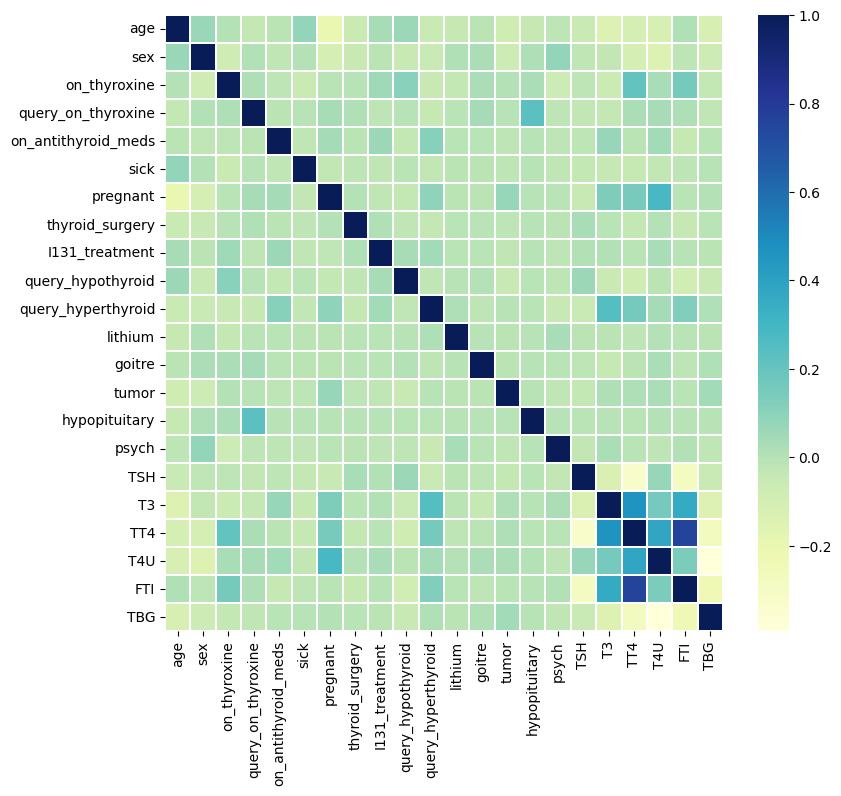

In [27]:
# checking correlation using Heatmap
import seaborn as sns
corrmat = x.corr()
f, ax = plt.subplots (figsize = (9, 8))
sns.heatmap (corrmat, ax = ax, cmap = "YlGnBu", linewidths = 0.1)


In [28]:

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)



In [29]:

# Scale the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



In [30]:
# Handling imbalanced data
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0, k_neighbors=1)
x_bal, y_bal = os.fit_resample(x_train, y_train)
x_test_bal, y_test_bal = os.fit_resample(x_test, y_test)


In [31]:
# Apply SMOTE only on the training set, not on the test set
# x_test_bal, y_test_bal = os.fit_resample(x_test, y_test)


In [32]:
print(y_train.value_counts())


target
4         471
2         351
1         302
6         265
5         230
3         144
0          26
Name: count, dtype: int64


In [33]:
x_bal

array([[-1.69065366, -0.56508542, -0.45692864, ..., -2.42054833,
        -1.49123375,  3.36064931],
       [-0.21146714, -0.56508542,  2.18852553, ..., -0.26780448,
         0.16088479, -0.18244657],
       [ 1.06369366,  1.76964395, -0.45692864, ...,  0.14718228,
        -0.13703823, -0.18244657],
       ...,
       [ 1.26771939, -0.56508542,  2.18852553, ...,  0.40739602,
         0.14468939, -0.18244657],
       [ 0.68966814,  1.76964395,  2.18852553, ...,  0.07800682,
         1.07170411, -0.18244657],
       [ 1.05362086, -0.56508542,  2.18852553, ...,  0.47907369,
        -0.2779769 , -0.18244657]])

In [34]:
# Convert arrays to dataframes
columns = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
x_train_bal = pd.DataFrame(x_bal, columns=columns)
y_train_bal = pd.DataFrame(y_bal, columns=['target'])
x_test_bal = pd.DataFrame(x_test_bal, columns=columns)
y_test_bal = pd.DataFrame(y_test_bal, columns=['target'])


In [35]:
# Random Forest Classifier Model
rfr = RandomForestClassifier().fit(x_bal, y_bal.values.ravel())
y_pred = rfr.predict(x_test_bal)
print(classification_report(y_test_bal, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       122
           1       0.90      0.89      0.89       122
           2       0.94      0.98      0.96       122
           3       0.90      0.92      0.91       122
           4       0.98      1.00      0.99       122
           5       0.95      0.94      0.95       122
           6       1.00      0.93      0.96       122

    accuracy                           0.95       854
   macro avg       0.95      0.95      0.95       854
weighted avg       0.95      0.95      0.95       854



In [36]:
print(x_bal.shape, y_bal.shape, x_test_bal.shape, y_test_bal.shape)


(3297, 22) (3297, 1) (854, 22) (854, 1)


In [37]:


from sklearn.metrics import accuracy_score
test_score=accuracy_score(y_test_bal,y_pred)

test_score


0.949648711943794

In [38]:

train_score = accuracy_score(y_bal,rfr.predict(x_bal))
train_score


1.0

In [39]:
# Feature importance
from sklearn.inspection import permutation_importance
results = permutation_importance(rfr, x_bal, y_bal, scoring='accuracy')
feature_importance = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
importance = results.importances_mean
importance = np.sort(importance)
for i, v in enumerate(importance):
    i = feature_importance[i]
    print('Feature: {:<20} Score: {}'.format(i, v))


Feature: age                  Score: 0.0
Feature: sex                  Score: 0.0
Feature: on_thyroxine         Score: 0.0
Feature: query_on_thyroxine   Score: 0.0
Feature: on_antithyroid_meds  Score: 0.0
Feature: sick                 Score: 0.00012132241431603852
Feature: pregnant             Score: 0.00024264482863207705
Feature: thyroid_surgery      Score: 0.0003033060357900963
Feature: I131_treatment       Score: 0.0011525629360024548
Feature: query_hypothyroid    Score: 0.0015165301789505704
Feature: query_hyperthyroid   Score: 0.002123142250530785
Feature: lithium              Score: 0.0023657870791628623
Feature: goitre               Score: 0.0034576888080072978
Feature: tumor                Score: 0.012920837124658769
Feature: hypopituitary        Score: 0.026387625113739755
Feature: psych                Score: 0.02735820442826815
Feature: TSH                  Score: 0.04792235365483773
Feature: T3                   Score: 0.06927509857446165
Feature: TT4                  Score

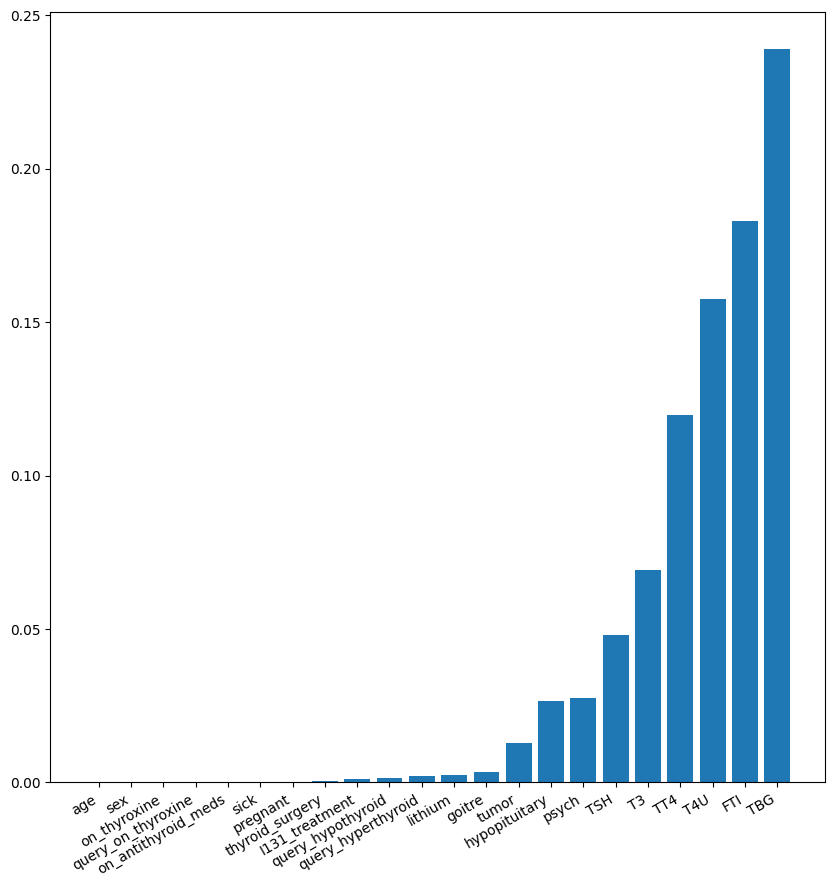

In [40]:

plt.figure(figsize=(10, 10))
plt.bar(feature_importance, importance.astype(float))
plt.xticks(rotation=30, ha='right')
plt.show()


In [41]:
x.head()


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000,0.0,0.0,0.00,0.0,36.0
18,63.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,68.000000,0.0,48.0,1.02,47.0,0.0
32,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,1.6,39.0,1.00,39.0,0.0
33,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,0.0,126.0,1.38,91.0,0.0
39,55.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,9.599999,2.4,136.0,1.48,92.0,0.0


In [42]:
# Convert x_bal back to a DataFrame if necessary
if isinstance(x_bal, np.ndarray):
    x_bal = pd.DataFrame(x_bal, columns=columns)  # Assuming 'columns' contains the column names

# Now you can drop the columns
x_bal.drop(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment'], axis=1, inplace=True)
# Drop the specified columns from the dataframe (assuming x_test_bal is still a DataFrame)
x_test_bal.drop(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment'], axis=1, inplace=True)




In [43]:

# Print the first 5 rows of the dataframe
x_bal.head()

,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,-0.310163,-0.310163,-0.082176,-0.071107,-0.17642,-0.033454,-0.147316,-0.316629,-0.939410,-1.772193,-2.420548,-1.491234,3.360649
1,-0.310163,-0.310163,-0.082176,-0.071107,-0.17642,-0.033454,-0.147316,-0.138016,0.311883,-0.160764,-0.267804,0.160885,-0.182447
2,-0.310163,-0.310163,-0.082176,-0.071107,-0.17642,-0.033454,-0.147316,-0.287665,-0.346692,-0.192674,0.147182,-0.137038,-0.182447
3,-0.310163,-0.310163,-0.082176,-0.071107,5.66830,-0.033454,-0.147316,-0.292492,1.168030,0.094511,0.458422,-0.069328,-0.182447
4,-0.310163,3.224113,-0.082176,-0.071107,-0.17642,-0.033454,-0.147316,-0.309388,4.921907,1.610212,-0.138121,1.758835,-0.182447


In [44]:
x_bal_filtered = x_bal[['goitre', 'tumor' , 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']]
x_test_bal_filtered = x_test_bal[['goitre', 'tumor' , 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']]


In [45]:
x_bal_filtered.head()


,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,-0.071107,-0.17642,-0.033454,-0.147316,-0.316629,-0.939410,-1.772193,-2.420548,-1.491234,3.360649
1,-0.071107,-0.17642,-0.033454,-0.147316,-0.138016,0.311883,-0.160764,-0.267804,0.160885,-0.182447
2,-0.071107,-0.17642,-0.033454,-0.147316,-0.287665,-0.346692,-0.192674,0.147182,-0.137038,-0.182447
3,-0.071107,5.66830,-0.033454,-0.147316,-0.292492,1.168030,0.094511,0.458422,-0.069328,-0.182447
4,-0.071107,-0.17642,-0.033454,-0.147316,-0.309388,4.921907,1.610212,-0.138121,1.758835,-0.182447


In [46]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(x_train, y_train)


RandomForestClassifier(max_leaf_nodes=30)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix # Import confusion_matrix

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(x_train, y_train)

y_pred = RFclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
 # Now you can use confusion_matrix




              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.87      0.88      0.87        74
           2       0.88      0.98      0.93        85
           3       0.86      0.82      0.84        38
           4       0.95      1.00      0.97       122
           5       0.96      0.84      0.90        51
           6       0.96      0.93      0.94        71

    accuracy                           0.92       448
   macro avg       0.78      0.78      0.78       448
weighted avg       0.90      0.92      0.91       448



In [48]:
print(confusion_matrix(y_test, y_pred))

[[  0   0   1   0   6   0   0]
 [  0  65   6   3   0   0   0]
 [  0   0  83   0   0   0   2]
 [  0   5   0  31   0   1   1]
 [  0   0   0   0 122   0   0]
 [  0   3   2   2   1  43   0]
 [  0   2   2   0   0   1  66]]


In [49]:
# HyperParameter Tuning for RF
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10, None]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf, cv=5)
grid_rf.fit(x_train, y_train)

print("Best parameters for Random Forest:", grid_rf.best_params_)


Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 300}


In [50]:
from sklearn.model_selection import GridSearchCV
rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10, None]
}
RFclassifier = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(RFclassifier, rf, cv=5)
grid_rf.fit(x_train, y_train)
print("Best parameters for Random Forest:", grid_rf.best_params_)
y_pred = grid_rf.predict(x_test)
print(classification_report(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))



Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.88      0.95      0.91        74
           2       0.95      0.98      0.97        85
           3       0.89      0.82      0.85        38
           4       0.97      1.00      0.98       122
           5       0.94      0.92      0.93        51
           6       0.99      0.93      0.96        71

    accuracy                           0.94       448
   macro avg       0.94      0.86      0.88       448
weighted avg       0.94      0.94      0.94       448

[[  3   0   0   0   4   0   0]
 [  0  70   1   3   0   0   0]
 [  0   2  83   0   0   0   0]
 [  0   4   0  31   0   2   1]
 [  0   0   0   0 122   0   0]
 [  0   2   1   1   0  47   0]
 [  0   2   2   0   0   1  66]]


In [51]:
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))



Random Forest accuracy is: 94.20%


In [52]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
xgb = XGBClassifier()
xgb.fit(x_train, y_train_encoded)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [53]:
y_test_encoded = le.transform(y_test)
y_pred = xgb.predict(x_test)
print(classification_report(y_test_encoded, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.95      0.93        74
           2       0.95      0.96      0.96        85
           3       0.86      0.84      0.85        38
           4       1.00      1.00      1.00       122
           5       0.92      0.92      0.92        51
           6       0.99      0.94      0.96        71

    accuracy                           0.95       448
   macro avg       0.95      0.95      0.95       448
weighted avg       0.95      0.95      0.95       448



In [54]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [100, 150, 200],
}
grid_search = GridSearchCV(XGBClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train_encoded)
best_params = grid_search.best_params_
print("Best parameters:", best_params)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)



Best parameters: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 100}
Accuracy: 0.953125


In [55]:
print(confusion_matrix(y_test, y_pred))

[[  5   0   0   0   2   0   0]
 [  0  70   1   3   0   0   0]
 [  0   0  84   0   0   1   0]
 [  0   2   0  34   0   2   0]
 [  0   0   0   0 122   0   0]
 [  0   2   1   2   0  46   0]
 [  0   2   2   0   0   1  66]]


In [56]:
XGBAcc = accuracy_score(y_test_encoded, y_pred)
print('XGB accuracy is: {:.2f}%'.format(XGBAcc*100))


XGB accuracy is: 95.31%


In [57]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(x_train, y_train)


SVC(kernel='linear', max_iter=251)

In [58]:
# Hyperparametric Tuning for SVC model
svc_params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [1, 10, 100],
    'gamma': ['scale', 'auto']
}

grid_svc = GridSearchCV(SVC(), svc_params, cv=5)
grid_svc.fit(x_train, y_train)

print("Best parameters for SVC:", grid_svc.best_params_)

y_pred = SVCclassifier.predict(x_test)
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))




Best parameters for SVC: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.79      0.80      0.79        74
           2       0.83      0.74      0.78        85
           3       0.73      0.58      0.65        38
           4       0.89      0.95      0.92       122
           5       0.76      0.75      0.75        51
           6       0.87      0.96      0.91        71

    accuracy                           0.83       448
   macro avg       0.79      0.80      0.79       448
weighted avg       0.83      0.83      0.83       448

[[  6   0   0   0   1   0   0]
 [  1  59   7   3   2   2   0]
 [  1   4  63   0   9   3   5]
 [  0   6   2  22   0   7   1]
 [  1   1   0   0 116   0   4]
 [  0   4   3   4   2  38   0]
 [  0   1   1   1   0   0  68]]


In [59]:
#Evaluating Performance Of The svc Model Using GridSearch CV

from sklearn.model_selection import GridSearchCV
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [1, 10, 100],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best parameters:", best_params)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.8660714285714286


In [60]:
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

SVC accuracy is: 86.61%


In [61]:

models = pd.DataFrame({
    'Model' : ['Random Forest Classifier','SVC Model','XGB classifier'],
    'Score' : [RFAcc,SVCAcc,XGBAcc]
    })
models.sort_values(by = 'Score', ascending = False)



,Model,Score
2,XGB classifier,0.953125
0,Random Forest Classifier,0.941964
1,SVC Model,0.866071


In [62]:
models = pd.DataFrame({
    'Model': ['Random Forest Classifier', 'SVC Model', 'XGB classifier'],
    'Score': [RFAcc, SVCAcc, XGBAcc]
})

models_sorted = models.sort_values(by='Score', ascending=False)
models_sorted

best_model_name = models_sorted.iloc[0, 0]
if best_model_name == 'Random Forest Classifier':
    best_model = grid_rf.best_estimator_
elif best_model_name == 'SVC Model':
    best_model = grid_svc.best_estimator_
elif best_model_name == 'XGB classifier':
    best_model = grid_search.best_estimator_


In [63]:
features = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.0]])
print(label_encoder.inverse_transform(xgb.predict(features)))

['hypothyroid conditions']


In [64]:
data['target'].unique()


array(['miscellaneous', 'hypothyroid conditions', 'binding protein',
       'replacement therapy', 'general health', 'hyperthyroid conditions',
       'antithyroid treatment'], dtype=object)

In [65]:
y['target'].unique()

array([5, 4, 1, 6, 2, 3, 0])

In [67]:
# Save the best model and the label encoder
pickle.dump(best_model, open('thyroid_1_model.pkl', 'wb'))
pickle.dump(le, open('label_encoder.pkl', 'wb'))  